# Loan Data Analysis

In [1]:
#Importing Relevant Libraries

import numpy as np
import pandas as pd

In [2]:
#Import Data

data=pd.read_csv('LoanApprovalData.csv',sep=',')

## Data Exploration

In [3]:
#Discovering the variables
data.columns

Index(['occ', 'loanamt', 'action', 'msa', 'suffolk', 'appinc', 'typur', 'unit',
       'married', 'dep', 'emp', 'yjob', 'self', 'atotinc', 'cototinc', 'hexp',
       'price', 'other', 'liq', 'rep', 'gdlin', 'lines', 'mortg', 'cons',
       'pubrec', 'hrat', 'obrat', 'fixadj', 'term', 'apr', 'prop', 'inss',
       'inson', 'gift', 'cosign', 'unver', 'review', 'netw', 'unem', 'min30',
       'bd', 'mi', 'old', 'vr', 'sch', 'black', 'hispan', 'male', 'reject',
       'approve', 'mortno', 'mortperf', 'mortlat1', 'mortlat2', 'chist',
       'multi', 'loanprc', 'thick', 'white'],
      dtype='object')

In [4]:
#Discovering the variables
data.shape

(1989, 59)

In [5]:
#Selecting Variables of Interest

df = data.drop(['occ', 'action', 'msa', 'suffolk', 'appinc', 'typur', 'unit',
        'dep', 'emp', 'yjob', 'self', 'atotinc', 'cototinc', 'hexp',
       'price', 'other', 'liq', 'rep', 'gdlin', 'lines', 'mortg', 'cons',
       'pubrec', 'hrat', 'obrat', 'fixadj', 'term', 'apr', 'prop', 'inss',
       'inson', 'gift', 'cosign', 'unver', 'review', 'netw', 'unem', 'min30',
       'bd', 'mi', 'vr', 'black', 'hispan', 'reject','approve', 'mortno', 'mortperf', 'mortlat1', 'mortlat2', 'chist',
       'multi', 'loanprc', 'thick', 'white'], axis=1)

In [7]:
#A Sample of the Data
df.head()

,loanamt,married,old,sch,male
0,89,0.0,0,1,NaN
1,128,1.0,0,1,1.0
2,128,0.0,0,1,1.0
3,66,1.0,1,1,1.0
4,120,1.0,0,0,1.0


In [8]:
#Introducing a variable that categorizes loan amounts into 3 bins- low, average and high value

z=[]

for x in df['loanamt']:
    if x<=100:
        z.append('Low Value')
    elif 100 < x <= 126:
        z.append('Average')
    elif x>126:
        z.append('High Value')
        
y=pd.DataFrame(z,columns=['loancategory'])

df=pd.concat([df,y],axis=1,ignore_index=True)

df.columns=['loanamt','married','old','sch','male','loancategory']

#To view a sample of the new data frame
df.head()


,loanamt,married,old,sch,male,loancategory
0,89,0.0,0,1,NaN,Low Value
1,128,1.0,0,1,1.0,High Value
2,128,0.0,0,1,1.0,High Value
3,66,1.0,1,1,1.0,Low Value
4,120,1.0,0,0,1.0,Average


In [9]:
#Exploring the Categorical Variables

print(df['married'].unique())
print(df['old'].unique())
print(df['sch'].unique())
print(df['male'].unique())

[ 0.  1. nan]
[0 1]
[1 0]
[nan  1.  0.]


In [9]:
#Checking for Null Values

df.isnull().sum()

loanamt          0
married          3
old              0
sch              0
male            15
loancategory     0
dtype: int64

In [10]:
#Dropping Null Values

df=df.dropna()

In [11]:
df.isnull().sum()

loanamt         0
married         0
old             0
sch             0
male            0
loancategory    0
dtype: int64

In [19]:
#Exploring the Data After Deleting Null Values

df1=df.drop(['loanamt'], axis=1)
df1.nunique()

married         2
old             2
sch             2
male            2
loancategory    3
dtype: int64

In [20]:
#Getting the Range of Values for the Categorical Data

print(df['married'].unique())
print(df['old'].unique())
print(df['sch'].unique())
print(df['male'].unique())
print(df['loancategory'].unique())

[1 0]
[0 1]
[1 0]
[1 0]
['High Value' 'Low Value' 'Average']


In [12]:
#Getting Information about the Data Set

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1 to 1988
Data columns (total 6 columns):
loanamt         1971 non-null int64
married         1971 non-null float64
old             1971 non-null int64
sch             1971 non-null int64
male            1971 non-null float64
loancategory    1971 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 107.8+ KB


In [13]:
#Setting the Data Type for Categorical Variables to Integers

df['loanamt'] = df['loanamt'].astype('float')

df['married'] = df['married'].astype('int')

df['male'] = df['male'] .astype('int')

In [14]:
df.dtypes

loanamt         float64
married           int32
old               int64
sch               int64
male              int32
loancategory     object
dtype: object

In [15]:
df.shape

(1971, 6)

In [16]:
#Getting Summary Statistics for the Continuous Variable- Loan Amount

df['loanamt'].describe()

count    1971.000000
mean      143.445967
std        80.784168
min         2.000000
25%       100.000000
50%       126.000000
75%       165.000000
max       980.000000
Name: loanamt, dtype: float64

In [17]:
import seaborn as sns

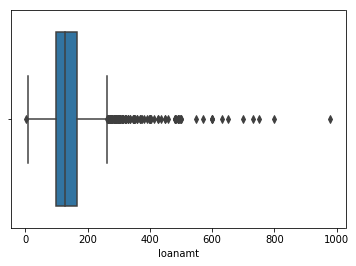

In [18]:
#Visualizing the Loan Amounts and Identifying Outliers of the Dataset

sns.boxplot(x=df['loanamt'])

In [21]:
#Determining the Balance of the Data

df1['married'].value_counts(normalize=True)

1    0.659564
0    0.340436
Name: married, dtype: float64

In [22]:
#Determining the Balance of the Data

df1['old'].value_counts(normalize=True)

0    0.531202
1    0.468798
Name: old, dtype: float64

In [23]:
#Determining the Balance of the Data

df1['sch'].value_counts(normalize=True)

1    0.770167
0    0.229833
Name: sch, dtype: float64

In [24]:
#Determining the Balance of the Data

df1['male'].value_counts(normalize=True)

1    0.813293
0    0.186707
Name: male, dtype: float64

In [25]:
#Determining the Balance of the Data

df1['loancategory'].value_counts(normalize=True)

High Value    0.499239
Low Value     0.263318
Average       0.237443
Name: loancategory, dtype: float64

## Exploring Relationships in the Data Using Cross Tabulation

In [26]:
#Cross Tabulation

pd.crosstab(df['loancategory'],df['married'], margins=True)

married,0,1,All
loancategory,,,
Average,178,290,468
High Value,258,726,984
Low Value,235,284,519
All,671,1300,1971


In [27]:
#Cross Tabulation

pd.crosstab(df['loancategory'],df['married'], margins=True,normalize=True)

married,0,1,All
loancategory,,,
Average,0.090309,0.147133,0.237443
High Value,0.130898,0.368341,0.499239
Low Value,0.119229,0.144089,0.263318
All,0.340436,0.659564,1.000000


In [28]:
#Cross Tabulation

pd.crosstab(df['loancategory'],df['old'], margins=True,normalize=True)

old,0,1,All
loancategory,,,
Average,0.150178,0.087265,0.237443
High Value,0.255708,0.243531,0.499239
Low Value,0.125317,0.138001,0.263318
All,0.531202,0.468798,1.000000


In [29]:
#Cross Tabulation

pd.crosstab(df['loancategory'],df['sch'], margins=True,normalize=True)

sch,0,1,All
loancategory,,,
Average,0.069508,0.167935,0.237443
High Value,0.076104,0.423135,0.499239
Low Value,0.084221,0.179097,0.263318
All,0.229833,0.770167,1.000000


In [30]:
#Cross Tabulation

pd.crosstab(df['loancategory'],df['male'], margins=True,normalize=True)

male,0,1,All
loancategory,,,
Average,0.048706,0.188737,0.237443
High Value,0.062405,0.436834,0.499239
Low Value,0.075596,0.187722,0.263318
All,0.186707,0.813293,1.000000


## Simple Visualizations 

In [31]:
#Importing Relevant Libraries

import matplotlib.pyplot as plt

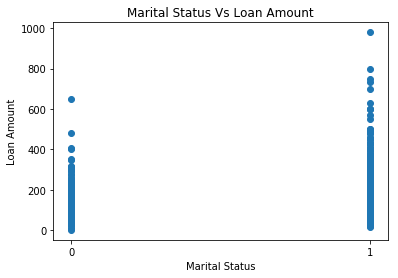

In [32]:
#Creating a Scatter Plot

fig,ax=plt.subplots()
maritalStatus=ax.scatter(
df['married'],
df['loanamt']
)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Loan Amount')
ax.set_title('Marital Status Vs Loan Amount')
plt.xticks([0,1])

plt.show()

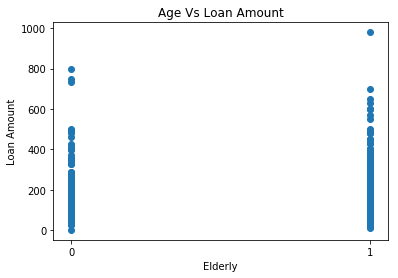

In [33]:
#Creating a Scatter Plot

fig,ax=plt.subplots()
age=ax.scatter(
df['old'],
df['loanamt']
)
ax.set_xlabel('Elderly')
ax.set_ylabel('Loan Amount')
ax.set_title('Age Vs Loan Amount')
plt.xticks([0,1])

plt.show()

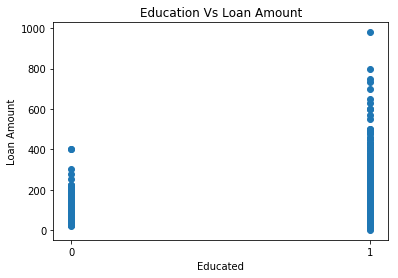

In [34]:
#Creating a Scatter Plot

fig,ax=plt.subplots()
education=ax.scatter(
df['sch'],
df['loanamt']
)
ax.set_xlabel('Educated')
ax.set_ylabel('Loan Amount')
ax.set_title('Education Vs Loan Amount')
plt.xticks([0,1])

plt.show()

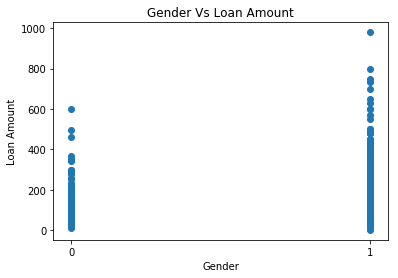

In [35]:
#Creating a Scatter Plot

fig,ax=plt.subplots()
maritalStatus=ax.scatter(
df['male'],
df['loanamt']
)
ax.set_xlabel('Gender')
ax.set_ylabel('Loan Amount')
ax.set_title('Gender Vs Loan Amount')
plt.xticks([0,1])

plt.show()

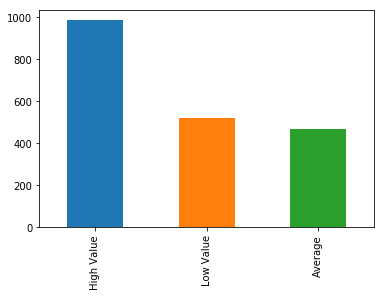

In [36]:
#Creating a Bar Chart Describing the Uptake of loans Across Loan Categories

df.loancategory.value_counts().plot(kind='bar')

In [37]:
#Splitting the Data Across Marital Status (Married or Unmarried)

married=[]
unmarried=[]
y=0

for x in df['married']:
    if x==1:
        married.append(df.iloc[y,0])
    elif x==0:
        unmarried.append(df.iloc[y,0])
    y+=1

married=pd.Series(married)
unmarried=pd.Series(unmarried)

In [38]:
#Importing Relevant Libraries

from statsmodels.stats.weightstats import ttest_ind

In [39]:
#T-test to Determine if there is a Statistical Difference in Loan Amount Requested Across Categories

maritalttest = ttest_ind(married,unmarried)
maritalttest

(8.211171061299025, 3.916311248815875e-16, 1969.0)

In [40]:
#Splitting the Data Across Age (Young or Old)


old=[]
young=[]
y=0

for x in df['old']:
    if x==1:
        old.append(df.iloc[y,0])
    elif x==0:
        young.append(df.iloc[y,0])
    y+=1

old=pd.Series(old)
young=pd.Series(young)

In [41]:
#T-test to Determine if there is a Statistical Difference in Loan Amount Requested Across Categories

agettest = ttest_ind(old,young)
agettest

(3.520080449318185, 0.0004412212805026949, 1969.0)

In [42]:
#Splitting the Data Across Eucation Status (Educated or Uneducated)

edu=[]
unedu=[]
y=0

for x in df['sch']:
    if x==1:
        edu.append(df.iloc[y,0])
    elif x==0:
        unedu.append(df.iloc[y,0])
    y+=1

edu=pd.Series(edu)
unedu=pd.Series(unedu)

In [43]:
#T-test to Determine if there is a Statistical Difference in Loan Amount Requested Across Categories

eduttest = ttest_ind(edu,unedu)
eduttest

(8.305104892308528, 1.8307348092605922e-16, 1969.0)

In [44]:
#Splitting the Data Across Gender (Male or Female)

male=[]
female=[]
y=0

for x in df['male']:
    if x==1:
        male.append(df.iloc[y,0])
    elif x==0:
        female.append(df.iloc[y,0])
    y+=1
male=pd.Series(male)
female=pd.Series(female)

In [45]:
#T-test to Determine if there is a Statistical Difference in Loan Amount Requested Across Categories

sexttest = ttest_ind(male,female)
sexttest

(6.097221550754392, 1.2954277927489294e-09, 1969.0)